<a href="https://colab.research.google.com/github/gouthamipriyanka/DeepLearning/blob/main/ITEC_5920_Kavya_Sai_Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Importing the necessary libraries


In [ ]:
!pip install Texttable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from numpy import where
from texttable import Texttable

In [ ]:
#Ignores unnecessary warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Deep_Learning/data.csv')

In [ ]:
df.head()

,no,city,quantity,region,dept,group_name,class_name,sub_name
0,0,690,0,9,12,7,14,13
1,1,429,0,3,12,7,14,13
2,2,181,0,10,12,7,14,13
3,3,136,0,9,12,7,14,13
4,4,376,0,5,12,7,14,13


Visualizing the number of samples for each unique label

+-------+-----------+------------+
| Label | Frequency | Percentage |
+-------+-----------+------------+
| 0     | 1041483   | 99.324     |
+-------+-----------+------------+
| 1     | 6901      | 0.658      |
+-------+-----------+------------+
| 2     | 174       | 0.017      |
+-------+-----------+------------+
| 3     | 12        | 0.001      |
+-------+-----------+------------+
| 5     | 3         | 0.000      |
+-------+-----------+------------+
| 6     | 2         | 0.000      |
+-------+-----------+------------+


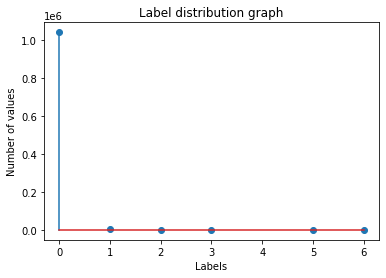

In [ ]:
# Instantiating the counter object
counter = Counter(df['quantity'])

# Instantiating table for displaying the data
initial_table = Texttable()
list_table_header = ['Label', 'Frequency', 'Percentage']
initial_table.add_row(list_table_header)

# Looping through the items to find the percentage
for label,frequency in counter.items():
	percentage = frequency / len(df['quantity']) * 100
	initial_table.add_row([label, frequency, percentage])


# Printing and plotting the data
print(initial_table.draw())
plt.stem(counter.keys(), counter.values())
plt.title('Label distribution graph')
plt.xlabel('Labels')
plt.ylabel('Number of values')
plt.show()

## Data Augmentation
Increasing sample sizes for labels 5 and 6 to facilitate oversampling



In [ ]:
# Copying the samples with label 5
df_copy_5 = df.loc[df['quantity'] == 5]

# Copying the samples with label 6
df_copy_6 = df.loc[df['quantity'] == 6]

# Concatenating all the samples into a single dataframe for duplicating the samples with labels 5 and 6
data = pd.concat([df,df_copy_5,df_copy_5,df_copy_5, df_copy_6,df_copy_6, df_copy_6,df_copy_6])




> All the samples with labelled zero are considered as blind dataset which cannot be used for training the model. Hence, they are separated from the original dataset and not modified at any point.



In [ ]:
# Splitting the train and blind test data based on the label
train_data = data[data['quantity']!= 0]
test_data = data[data['quantity'] == 0]

# Selecting the data with quantity other than zero for training
X_train = train_data.iloc[:,[1,3,4,5,6,7]]
y_train = train_data['quantity']

# Selecting the data with quantity other than zero for blind data testing
X_test = test_data.iloc[:,[1,3,4,5,6,7]]
y_test = test_data['quantity']

Shapes of the data after splitting

In [ ]:
# printing the shape of the X and y data of train and test sets
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test: ' + str(X_test.shape))
print('Y_test: ' + str(y_test.shape))

X_train: (7109, 6)
Y_train: (7109,)
X_test: (1041483, 6)
Y_test: (1041483,)


Summarizing the final distribution of samples for analysis

+-------+-----------+------------+
| Label | Frequency | Percentage |
+-------+-----------+------------+
| 1     | 6901      | 97.074     |
+-------+-----------+------------+
| 2     | 174       | 2.448      |
+-------+-----------+------------+
| 3     | 12        | 0.169      |
+-------+-----------+------------+
| 5     | 12        | 0.169      |
+-------+-----------+------------+
| 6     | 10        | 0.141      |
+-------+-----------+------------+


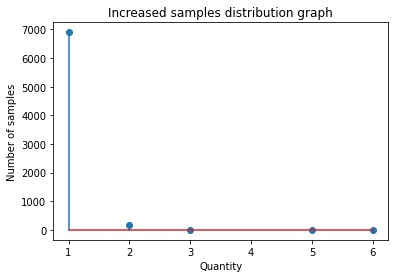

In [ ]:
#Instantiating the counter object
counter = Counter(y_train)

# Instantiating table for displaying the data
final_table = Texttable()
final_table.add_row(list_table_header)

for label_new,value_new in counter.items():
	percentage_new = value_new / len(y_train) * 100
	final_table.add_row([label_new,value_new,percentage_new])

# Printing and plotting the data
print(final_table.draw())
plt.stem(counter.keys(), counter.values())
plt.title('Increased samples distribution graph')
plt.xlabel('Quantity')
plt.ylabel('Number of samples')
plt.show()

## Data Pre-processing

Target Variable Analysis

In [ ]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm


 Mean(mu) = 1.04 and Standard Deviation(sigma) = 0.30



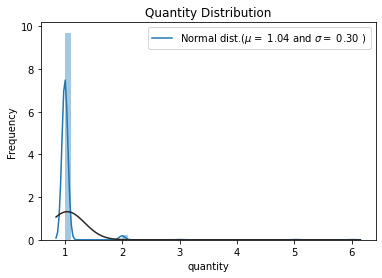

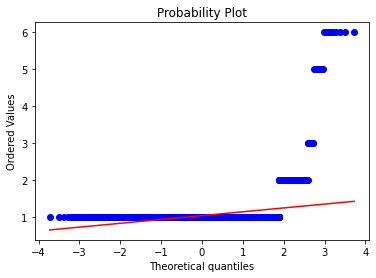

In [ ]:
# Fitting the data to observe the normality
sns.distplot(y_train,fit=norm)

# Mean and Standard deviation of the data
(data_mean, data_std_deviation) = norm.fit(y_train)
print('\n Mean(mu) = {:.2f} and Standard Deviation(sigma) = {:.2f}\n'.format(data_mean, data_std_deviation))

# Plotting the distribution
plt.title('Quantity Distribution')
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(data_mean, data_std_deviation)],
            loc='best')
plt.ylabel('Frequency')

# Plot for probability(Q-Q plot)
fig = plt.figure()
results = stats.probplot(y_train, plot=plt)
plt.show()

Visualization of dependent variables (x) with independent variable (y)


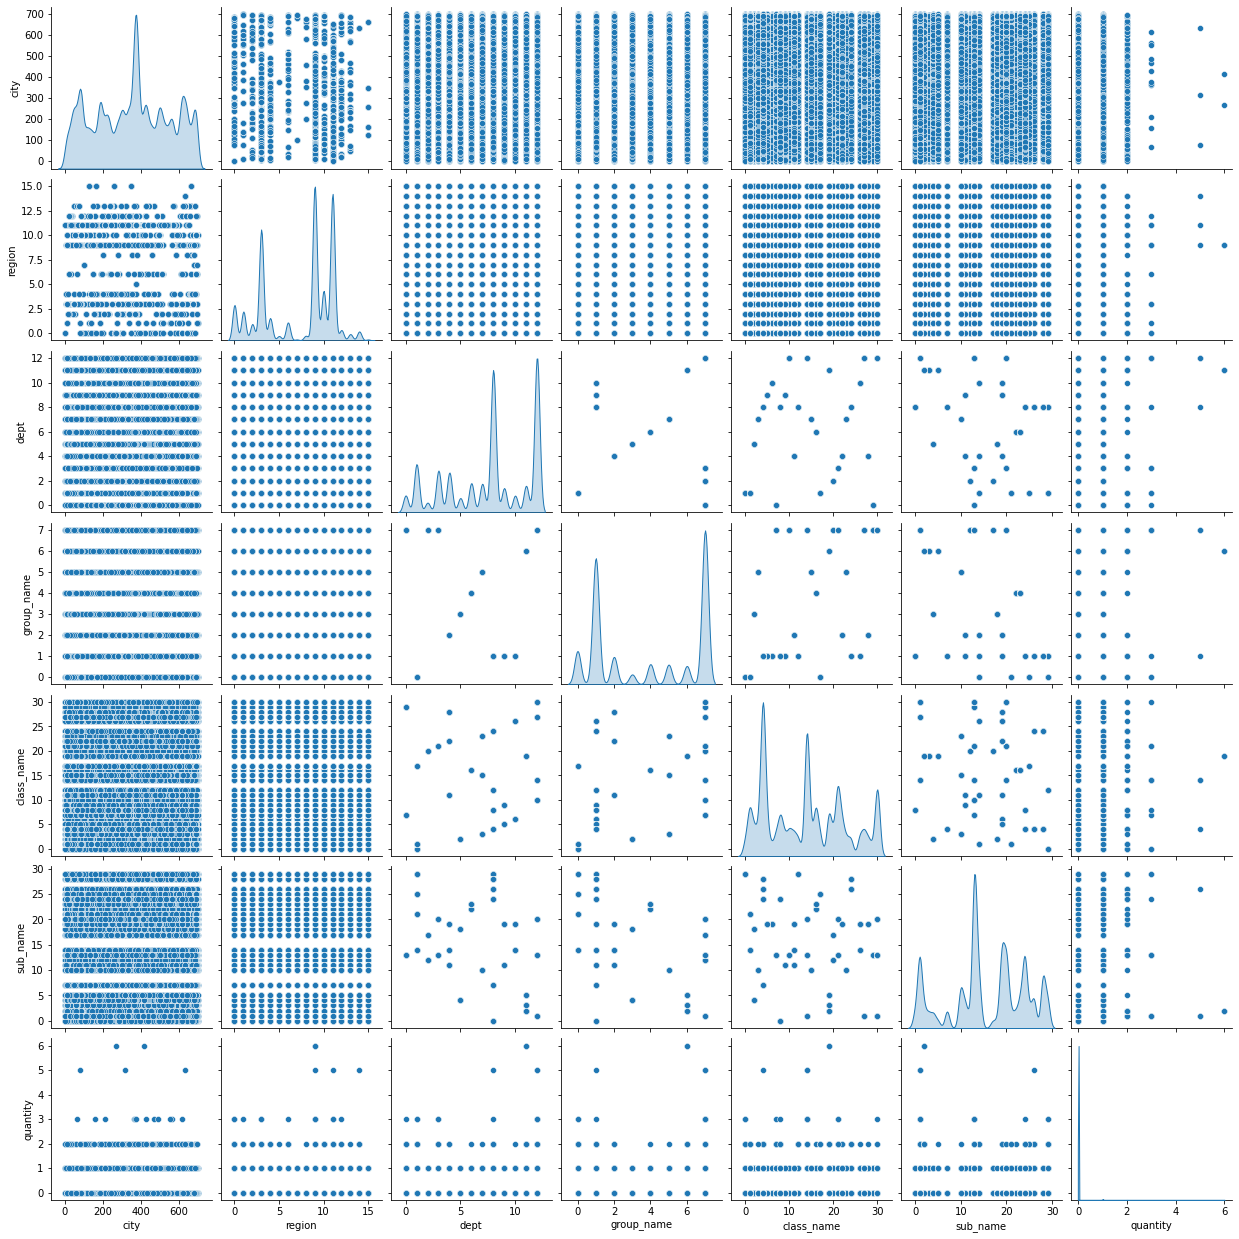

In [ ]:
# Plotting a pairplot for multi collinearity analysis
sns.pairplot(df[['city',
                 'region',
                 'dept',
                 'group_name',
                 'class_name',
                 'sub_name',
                 'quantity']], diag_kind='kde')

Handling imbalanced dataset using imblearn

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Oversampling using SMOTE to increase the number of minority samples

oversampled_data = imblearn.over_sampling.SMOTE(sampling_strategy ='not majority', random_state =5)
X_train, y_train = oversampled_data .fit_resample(X_train, y_train)

+-------+-----------+------------+
| Label | Frequency | Percentage |
+-------+-----------+------------+
| 1     | 6901      | 20         |
+-------+-----------+------------+
| 2     | 6901      | 20         |
+-------+-----------+------------+
| 3     | 6901      | 20         |
+-------+-----------+------------+
| 5     | 6901      | 20         |
+-------+-----------+------------+
| 6     | 6901      | 20         |
+-------+-----------+------------+


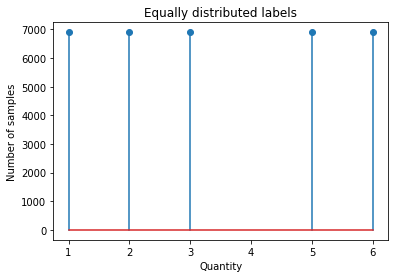

In [ ]:
# Label distribution after oversampling

# Instantiating the counter object
counter = Counter(y_train)

# Instantiating the texttable
oversampled_table = Texttable()
oversampled_table.add_row(list_table_header)

for labels_oversampled,values_oversampled in counter.items():
	oversampled_percentage = values_oversampled / len(y_train) * 100
	oversampled_table.add_row([labels_oversampled,values_oversampled,oversampled_percentage])

# Printing and plotting the distribution
print(oversampled_table.draw())
plt.stem(counter.keys(), counter.values())
plt.title('Equally distributed labels')
plt.xlabel('Quantity')
plt.ylabel('Number of samples')
plt.show()

Data Normalization - This is used for pure exploration as normalized data did not improve the performance.

In [ ]:
#Normalizing the input data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std
y_train_norm = (y_train - mean)/std
y_test_norm = (y_test - mean)/std

In [ ]:
print('The shape of X_train', X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(34505, 6)
(1041483, 6)
(34511,)
(1041489,)


Check for Missing values

In [ ]:
# Extracting the missing values
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
shape_value = missing_data.shape

# Printing the missing values
if (shape_value[0] == 0):
    print("There are no missing values in the data")
    print("Missing Values:", len(missing_data) )
else:
    print(missing_data.head(20))

There are no missing values in the data
Missing Values: 0


Feature Extraction

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from prettytable import PrettyTable

In [ ]:
# Instantiating the table
score_table = PrettyTable(['Specs', 'Scores'])

# Applying SelectKBest to extract top 6 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Removing the index column from dataframes
blankIndex=[''] * len(dfscores)
dfscores.index  = blankIndex
dfcolumns.index  = blankIndex

# Adding the rows to the score_table
score_table.add_row([dfcolumns,dfscores])
print(score_table)

+--------------+----------------+
|    Specs     |     Scores     |
+--------------+----------------+
|            0 |              0 |
|         city |   63920.289430 |
|       region |   11693.968585 |
|         dept |    6580.530127 |
|   group_name |    3255.403314 |
|   class_name |   22492.342565 |
|     sub_name |   54752.604046 |
+--------------+----------------+


Correlation HeatMap

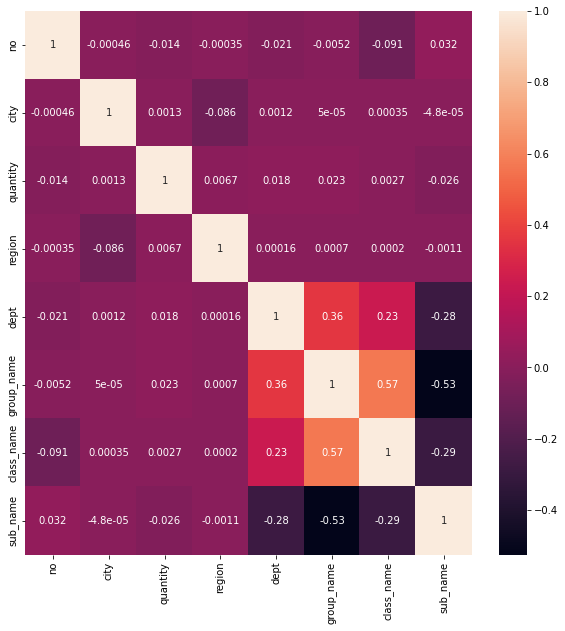

In [ ]:
# finding the correlation between data
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index

# plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(),annot=True)

Dataset partition into train and validation

In [ ]:
from sklearn.model_selection import train_test_split
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(X_train, X_validation, y_train, y_validation)  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 1) MultiLayer Perceptron

Importing the necessary modules

In [ ]:
from keras.models import Sequential, Input
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError,Accuracy,MeanSquaredError

Building the base MLP

In [ ]:
def build_model():
    """
    To build a neural network, we have input training data with shape (6,1).

    Sequential() is used to create model sequentially and the output of each layer
    is input to the next layer specified by adding a layer through model.add
    function.

    The Dense is used to specify the fully connected layer.
    Dense(output_dimension, activation_function)

    At the final layer, we do not place an activation function as this is a
    regression problem.

    """
    model_MLP = Sequential([
                            Input(shape=(X_train.shape[1],)),
                            Dense(64, activation="relu"),
                            Dense(32, activation="relu"),
                            Dense(2, activation="relu"),
                            Dense(1)
                            ], name="MLP_model")

    optimizer = Adam(0.001)

    model_MLP.compile(loss='mae',
                  optimizer=optimizer,
                  metrics= MeanSquaredError())
    return model_MLP

model_MLP = build_model()
model_MLP.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 2,597
Trainable params: 2,597
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Early Stopping for peroformance monitoring
EPOCHS = 300
early_stops_MLP = EarlyStopping(monitor="val_loss",patience= 50)

# Store training statistics in history_MLP for plotting the graphs
history_MLP = model_MLP.fit(X_train, y_train, epochs=EPOCHS, callbacks= [early_stops_MLP],
                    validation_split=0.2, verbose=1)

Epoch 1/300
691/691 [==============================] - 3s 3ms/step - loss: 1.4215 - mean_squared_error: 3.4418 - val_loss: 1.1147 - val_mean_squared_error: 2.2260
Epoch 2/300
691/691 [==============================] - 2s 2ms/step - loss: 1.0734 - mean_squared_error: 2.2958 - val_loss: 0.9452 - val_mean_squared_error: 1.7638
Epoch 3/300
691/691 [==============================] - 2s 2ms/step - loss: 0.9567 - mean_squared_error: 1.9198 - val_loss: 0.8664 - val_mean_squared_error: 1.5373
Epoch 4/300
691/691 [==============================] - 1s 2ms/step - loss: 0.8557 - mean_squared_error: 1.6156 - val_loss: 0.7952 - val_mean_squared_error: 1.6087
Epoch 5/300
691/691 [==============================] - 2s 2ms/step - loss: 0.7969 - mean_squared_error: 1.4219 - val_loss: 0.7264 - val_mean_squared_error: 1.1545
Epoch 6/300
691/691 [==============================] - 1s 2ms/step - loss: 0.7625 - mean_squared_error: 1.3125 - val_loss: 0.7062 - val_mean_squared_error: 1.1105
Epoch 7/300
691/691 [=

In [ ]:
# evaluate the model

train_mae, train_mse = model_MLP.evaluate(X_train, y_train, verbose=0)
val_mae, val_mse = model_MLP.evaluate(X_validation, y_validation, verbose=0)
print('Train Mean absolute error: %.3f, Validation mean absolute error: %.3f' % (train_mae,
                                                     val_mae))

Train Mean absolute error: 0.239, Validation mean absolute error: 0.259


In [ ]:
print('Train Mean squared error: %.3f, Validation mean squared error: %.3f' % (train_mse,
                                                     val_mse))

Train Mean squared error: 0.274, Validation mean squared error: 0.313


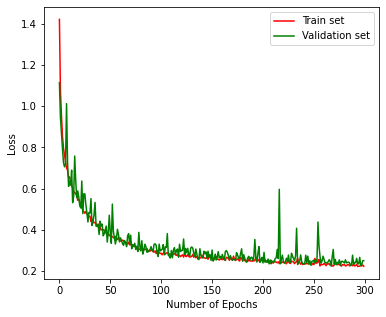

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history_MLP.history['loss'], color='r')
#validation loss
plt.plot(history_MLP.history['val_loss'], color='g')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(['Train set', 'Validation set'])
plt.show()

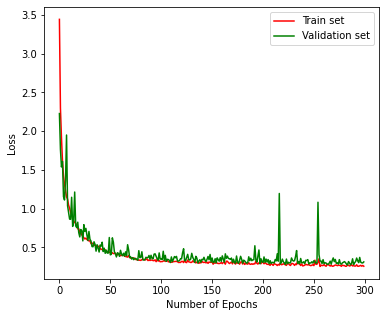

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history_MLP.history['mean_squared_error'], color='r')
#validation loss
plt.plot(history_MLP.history['val_mean_squared_error'], color='g')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(['Train set', 'Validation set'])
plt.show()

In [ ]:
# Predicting on validation set
y_pred_MLP = (np.round(model_MLP.predict(X_validation))).astype(int)
print("Predicted quantity \n", y_pred_MLP)
print("Real quantity\n", y_validation)

Predicted quantity 
 [[2]
 [5]
 [2]
 ...
 [2]
 [3]
 [5]]
Real quantity
 12564    2
26643    5
5466     1
7261     2
8602     2
        ..
6483     1
23372    5
4736     1
17080    3
21588    5
Name: quantity, Length: 6901, dtype: int64


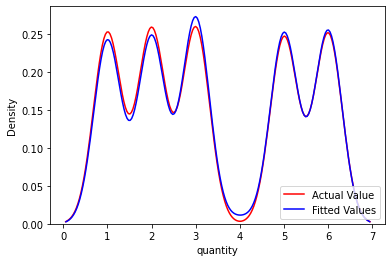

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_validation, hist=False, color="r", label='Actual Value')
sns.distplot(y_pred_MLP, hist=False, color="b", label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
#Predict on unseen test data
test_predictions_MLP = (np.round(model_MLP.predict(X_test)).flatten()).astype(int)
print("Test predictions\n", test_predictions_MLP)

Test predictions
 [1 2 1 ... 3 1 3]


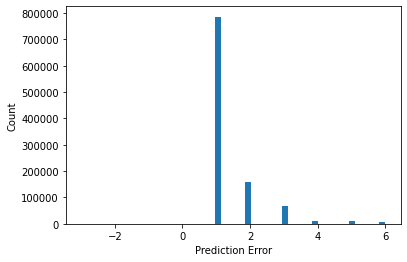

In [ ]:
#Plot true test labels and predicted test labels
def plot_prediction(test_labels, test_predictions):
#Plot prediction error
  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  plt.ylabel("Count")

plot_prediction(y_test,test_predictions_MLP)

### 1.1) MLP using Grid Search method

In [ ]:
#imports
! pip install -q -U keras-tuner
import keras_tuner as kt
import keras
from keras.layers import Flatten
from keras.layers import Input
from tensorflow.keras.metrics import MeanAbsoluteError

     |████████████████████████████████| 133 kB 5.1 MB/s 


In [ ]:
def model_builder(hyperparams):

  model_MLP_grid = Sequential()
  model_MLP_grid.add((Input(shape= (6,1))))

  # Tune the number of layers in the first Dense layer
  # Choose an optimal value between 5-15
  hp_num_layers= hyperparams.Int('Num_layers', min_value= 2, max_value= 4, step=2)

  for i in range(2, hp_num_layers):
    # range of neurons
    nodes = hyperparams.Int(f'nodes_{i}', min_value = 5, max_value = 32, step = 3)
    model_MLP_grid.add(Dense(units=hp_num_layers, activation='relu'))
    model_MLP_grid.add(BatchNormalization())

    #kernel_initializor_choice
    #choose an optimal kernal intialization
    initial = hyperparams.Choice("initialization", values= ['he_normal', 'random_normal', 'random_uniform'])

    #activation_choice - choose an optimal activation function
    activation_func = hyperparams.Choice("activation_func", values= ['ReLU', 'tanh', 'LeakyReLU'])

    model_MLP_grid.add(Dense(nodes, activation=activation_func))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, 0.0001.
  hp_learning_rate = hyperparams.Choice('learning_rate', values=[1e-2, 1e-3, 1e-3])
  model_MLP_grid.add(Dense(1))
  model_MLP_grid.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss= 'mse',
                metrics= MeanAbsoluteError())

  return model_MLP_grid

In [ ]:
"""
To instantiate the Hyperband tuner, specify the hypermodel, the
objective to optimize and the maximum number of epochs to train (max_epochs)"""

tuner = kt.Hyperband(model_builder,objective='val_loss',max_epochs= 100,
                     factor=3,directory='my_dir1', project_name='DL_Project_regression')


In [ ]:
#Create a callback to stop training early after reaching a certain
#value for the validation loss
stop_early = EarlyStopping(monitor='val_loss', patience= 10)

In [ ]:
#Run the hyperparameter search
tuner.search(X_train, y_train, validation_split= 0.2,
             callbacks=[stop_early])

Trial 254 Complete [00h 00m 18s]
val_loss: 3.4470157623291016

Best val_loss So Far: 3.063781976699829
Total elapsed time: 01h 17m 16s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
#Print optimal learning rate
print(f"""
The hyperparameter search is complete. The optimal number of units in the first
densely-connected layer is {best_hps.get('Num_layers')} and the optimal
learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first 
densely-connected layer is 4 and the optimal 
learning rate for the optimizer is 0.01.



In [ ]:
#print the optimal activation function
print(f"""
The hyperparameter search is complete. The optimal number of layer in the first
densely-connected layer is {best_hps.get('Num_layers')} and the optimal
activation function for the optimizer is {best_hps.get('activation_func')}.
""")


The hyperparameter search is complete. The optimal number of layer in the first 
densely-connected layer is 4 and the optimal 
activation function for the optimizer is ReLU.



In [ ]:
#print the optimal number of layers
print(f"""
The hyperparameter search is complete. The optimal number of layer in the
first densely-connected layer is {best_hps.get('Num_layers')} and the optimal
initilization factor for the optimizer is {best_hps.get('initialization')}.
""")


The hyperparameter search is complete. The optimal number of layer in the 
first densely-connected layer is 4 and the optimal 
initilization factor for the optimizer is random_normal.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_MLP_grid = tuner.hypermodel.build(best_hps)
model_MLP_grid.build((None, 6, 1))
model_MLP_grid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6, 4)              8         
                                                                 
 batch_normalization (BatchN  (None, 6, 4)             16        
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 6, 26)             130       
                                                                 
 dense_3 (Dense)             (None, 6, 4)              108       
                                                                 
 batch_normalization_1 (Batc  (None, 6, 4)             16        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 6, 20)            

In [ ]:
history_MLP_grid = model_MLP_grid.fit(X_train, y_train, epochs= 100, validation_split=0.2)

Epoch 1/100
691/691 [==============================] - 3s 3ms/step - loss: 3.6186 - mean_absolute_error: 1.6936 - val_loss: 3.4122 - val_mean_absolute_error: 1.6436
Epoch 2/100
691/691 [==============================] - 2s 3ms/step - loss: 3.4257 - mean_absolute_error: 1.6651 - val_loss: 3.4497 - val_mean_absolute_error: 1.6485
Epoch 3/100
691/691 [==============================] - 2s 3ms/step - loss: 3.4217 - mean_absolute_error: 1.6632 - val_loss: 3.4131 - val_mean_absolute_error: 1.6875
Epoch 4/100
691/691 [==============================] - 2s 3ms/step - loss: 3.4163 - mean_absolute_error: 1.6631 - val_loss: 3.4438 - val_mean_absolute_error: 1.7061
Epoch 5/100
691/691 [==============================] - 2s 3ms/step - loss: 3.4145 - mean_absolute_error: 1.6632 - val_loss: 3.5378 - val_mean_absolute_error: 1.7313
Epoch 6/100
691/691 [==============================] - 2s 3ms/step - loss: 3.4101 - mean_absolute_error: 1.6621 - val_loss: 3.4093 - val_mean_absolute_error: 1.6851
Epoch 7/10

In [ ]:
#print the best epoch of the obtained hypertuner model
val_loss_per_epoch = history_MLP_grid.history['val_loss']
best_epoch = val_loss_per_epoch.index(max(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch))

Best epoch: 51


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)
# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/51
691/691 [==============================] - 3s 3ms/step - loss: 5.7585 - mean_absolute_error: 1.9387 - val_loss: 3.4600 - val_mean_absolute_error: 1.6645
Epoch 2/51
691/691 [==============================] - 2s 3ms/step - loss: 3.4463 - mean_absolute_error: 1.6775 - val_loss: 3.4479 - val_mean_absolute_error: 1.6881
Epoch 3/51
691/691 [==============================] - 2s 3ms/step - loss: 3.4462 - mean_absolute_error: 1.6828 - val_loss: 3.4485 - val_mean_absolute_error: 1.6906
Epoch 4/51
691/691 [==============================] - 2s 3ms/step - loss: 3.4462 - mean_absolute_error: 1.6834 - val_loss: 3.4484 - val_mean_absolute_error: 1.6806
Epoch 5/51
691/691 [==============================] - 2s 3ms/step - loss: 3.4466 - mean_absolute_error: 1.6812 - val_loss: 3.4491 - val_mean_absolute_error: 1.6924
Epoch 6/51
691/691 [==============================] - 2s 3ms/step - loss: 3.4473 - mean_absolute_error: 1.6840 - val_loss: 3.4488 - val_mean_absolute_error: 1.6791
Epoch 7/51
691/6

In [ ]:
#print the result of the retrained model
eval_result = hypermodel.evaluate(X_validation, y_validation)
print("Mean Squared Error on validation set, Mean Absolute Error on validation set:", eval_result)

216/216 [==============================] - 0s 2ms/step - loss: 3.4196 - mean_absolute_error: 1.6781
Mean Squared Error on validation set, Mean Absolute Error on validation set: [3.419557571411133, 1.6780515909194946]


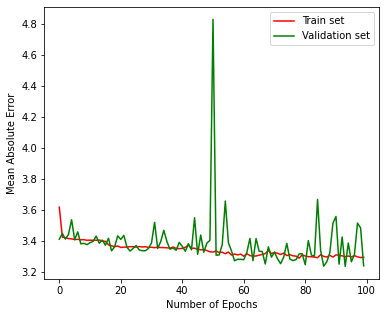

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history_MLP_grid.history['loss'], color='r')
#validation loss
plt.plot(history_MLP_grid.history['val_loss'], color='g')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend(['Train set', 'Validation set'])
plt.show()

## 2) Convolution Neural Network (CNN)

Create CNN model

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.metrics import Metric

In [ ]:
#Reshaping the training dataset to input in Convnet 1
# number of samples in train set
sample_size = X_train.shape[0]
# number of features in train set
time_steps  = X_train.shape[1]
# each feature is represented by 1 number
input_dimension = 1
X_train_reshape = X_train.values.reshape(sample_size,time_steps,input_dimension)
InputShape = X_train_reshape[0].shape
print("After reshape train data set shape:\n", X_train_reshape.shape)
print("1 Sample shape:\n",InputShape)

After reshape train data set shape:
 (27604, 6, 1)
1 Sample shape:
 (6, 1)


In [ ]:
#Define a Convolutional Neural Network Model
model_CNN = Sequential(name="model_conv1D")
model_CNN.add(Input(shape=InputShape))
model_CNN.add(Conv1D(64, 3, activation='relu', name="Conv1D_1"))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv1D(32, 3, activation='relu', name="Conv1D_2"))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv1D(16, 3, padding = 'same', activation='relu', name="Conv1D_3"))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling1D(pool_size=2, strides = 1, name="MaxPooling1D"))
model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
model_CNN.add(Dense(32, activation='relu', name="Dense_1"))
model_CNN.add(Dense(1))

In [ ]:
#Define model params and shape at each layer output
learning_rate = 0.001
model_CNN.compile(loss = 'mae',
              optimizer = Adam(learning_rate), metrics = 'mse' )
model_CNN.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             256       
                                                                 
 batch_normalization (BatchN  (None, 4, 64)            256       
 ormalization)                                                   
                                                                 
 Conv1D_2 (Conv1D)           (None, 2, 32)             6176      
                                                                 
 batch_normalization_1 (Batc  (None, 2, 32)            128       
 hNormalization)                                                 
                                                                 
 Conv1D_3 (Conv1D)           (None, 2, 16)             1552      
                                                                 
 batch_normalization_2 (Batc  (None, 2, 16)           

In [ ]:
# fitting and training the model with best hyperparameters
early_stops_CNN = EarlyStopping(monitor="val_loss",patience= 30)
history_CNN = model_CNN.fit( X_train, y_train, epochs = 100, batch_size = 100, callbacks= [early_stops_CNN] , verbose=1, validation_data = (X_validation, y_validation))

Epoch 1/100
277/277 [==============================] - 15s 13ms/step - loss: 1.5133 - mse: 4.1420 - val_loss: 1.3368 - val_mse: 2.5826
Epoch 2/100
277/277 [==============================] - 2s 7ms/step - loss: 0.9140 - mse: 1.4209 - val_loss: 1.2006 - val_mse: 1.9239
Epoch 3/100
277/277 [==============================] - 2s 7ms/step - loss: 0.7997 - mse: 1.1360 - val_loss: 1.3001 - val_mse: 2.4290
Epoch 4/100
277/277 [==============================] - 2s 7ms/step - loss: 0.7522 - mse: 1.0382 - val_loss: 1.2020 - val_mse: 2.0501
Epoch 5/100
277/277 [==============================] - 2s 7ms/step - loss: 0.6863 - mse: 0.8929 - val_loss: 1.0724 - val_mse: 1.6705
Epoch 6/100
277/277 [==============================] - 2s 7ms/step - loss: 0.6416 - mse: 0.8148 - val_loss: 1.1999 - val_mse: 2.1173
Epoch 7/100
277/277 [==============================] - 2s 6ms/step - loss: 0.6213 - mse: 0.7694 - val_loss: 1.2434 - val_mse: 2.4523
Epoch 8/100
277/277 [==============================] - 2s 6ms/step 

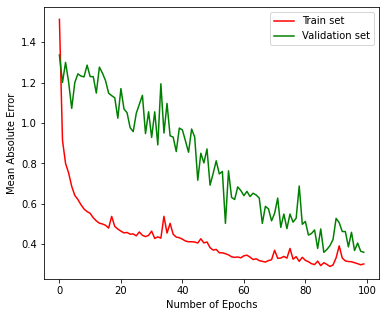

In [ ]:
# Plotting the learning curve
plt.figure(figsize=(6, 5))

# training loss
plt.plot(history_CNN.history['loss'], color='r')

# validation loss
plt.plot(history_CNN.history['val_loss'], color='g')
plt.legend(['Train set', 'Validation set'])
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Absolute Error")
plt.show()

In [ ]:
#Evaluate the trained model on validation set
Y_pred_CNN = (np.round(model_CNN.predict(X_validation))).astype(int)
print("Predicted quantity \n", Y_pred_CNN)
print("Real quantity\n", y_validation)

Predicted quantity 
 [[3]
 [5]
 [2]
 ...
 [1]
 [3]
 [5]]
Real quantity
 12564    2
26643    5
5466     1
7261     2
8602     2
        ..
6483     1
23372    5
4736     1
17080    3
21588    5
Name: quantity, Length: 6901, dtype: int64


In [ ]:
from numpy import savetxt
# save to csv file
savetxt('Validation_predictions.csv', Y_pred_CNN, delimiter=',')
savetxt('Validation_data.csv', y_validation, delimiter=',')

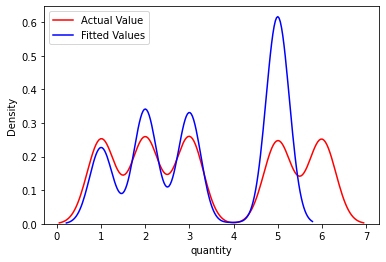

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_validation, hist=False, color="r", label='Actual Value')
sns.distplot(Y_pred_CNN, hist=False, color="b", label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
train_mae_CNN, train_mse_CNN = model_CNN.evaluate(X_train, y_train, verbose=0)
val_mae_CNN, val_mse_CNN = model_CNN.evaluate(X_validation, y_validation, verbose=0)
print('Train Mean absolute error: %.3f, Validation mean absolute error: %.3f' % (train_mae_CNN,
                                                     val_mae_CNN))

Train Mean absolute error: 0.382, Validation mean absolute error: 0.401


In [ ]:
print('Train Mean square error: %.3f, Validation mean square error: %.3f' % (train_mse_CNN,
                                                     val_mse_CNN))

Train Mean square error: 0.378, Validation mean square error: 0.421


In [ ]:
# Predict on unseen test data
test_predictions_CNN = (np.round(model_CNN.predict(X_test)).flatten()).astype(int)
print("Test predictions\n", test_predictions_CNN)

Test predictions
 [1 1 1 ... 2 2 2]


In [ ]:
# Save to csv file
savetxt('Test_predictions.csv', test_predictions_CNN, delimiter=',')

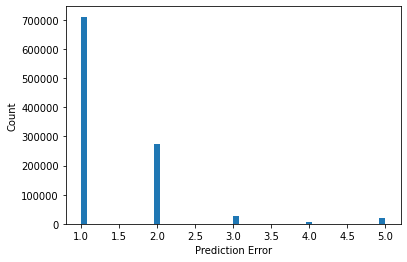

In [ ]:
# Plot true test labels and predicted test labels
def plot_prediction(test_labels, test_predictions):
# Plot prediction error
  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

plot_prediction(y_test, test_predictions_CNN)

## 3) Long Short Term Memory (LSTM)

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
# Building the sequential model for LSTM

model_LSTM = Sequential()

# Input shape of the data is (6,1)
model_LSTM.add(LSTM(64, input_shape= InputShape ,return_sequences=True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(64, activation = 'relu'))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(Dense(1))

In [ ]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             16896     
                                                                 
 dropout_1 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 6

In [ ]:
# Compiling and training the model

model_LSTM.compile(loss = 'mae', optimizer = "rmsprop", metrics = 'mse' )
history_LSTM = model_LSTM.fit( X_train, y_train, epochs = 200, batch_size = 100 , verbose=1, validation_data = (X_validation, y_validation))

Epoch 1/200
277/277 [==============================] - 7s 11ms/step - loss: 1.4791 - mse: 3.3288 - val_loss: 1.3550 - val_mse: 2.3674
Epoch 2/200
277/277 [==============================] - 2s 7ms/step - loss: 1.2001 - mse: 2.4979 - val_loss: 1.3973 - val_mse: 2.6992
Epoch 3/200
277/277 [==============================] - 2s 7ms/step - loss: 1.0646 - mse: 2.0364 - val_loss: 0.9573 - val_mse: 1.6346
Epoch 4/200
277/277 [==============================] - 2s 8ms/step - loss: 0.9195 - mse: 1.5296 - val_loss: 0.8798 - val_mse: 1.6923
Epoch 5/200
277/277 [==============================] - 2s 9ms/step - loss: 0.8066 - mse: 1.1908 - val_loss: 0.6143 - val_mse: 0.9192
Epoch 6/200
277/277 [==============================] - 2s 8ms/step - loss: 0.7555 - mse: 1.0544 - val_loss: 0.8562 - val_mse: 1.1549
Epoch 7/200
277/277 [==============================] - 2s 8ms/step - loss: 0.7052 - mse: 0.9344 - val_loss: 0.5786 - val_mse: 0.7171
Epoch 8/200
277/277 [==============================] - 2s 8ms/step -

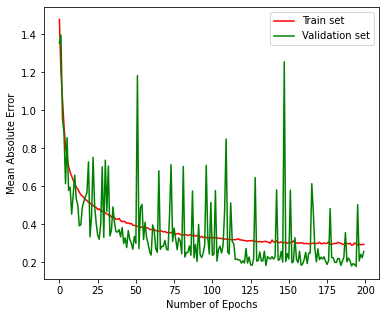

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history_LSTM.history['loss'], color='r')
# validation loss
plt.plot(history_LSTM.history['val_loss'], color='g')
plt.legend(['Train set', 'Validation set'])
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Absolute Error")
plt.show()

In [ ]:
predictions_LSTM = model_LSTM.predict(X_validation)

In [ ]:
print("Predicted quantity \n", predictions_LSTM)
print("Real quantity\n", y_validation)

Predicted quantity 
 [[2.3241343]
 [4.8900065]
 [2.0517647]
 ...
 [1.2539537]
 [2.99822  ]
 [4.8958306]]
Real quantity
 12564    2
26643    5
5466     1
7261     2
8602     2
        ..
6483     1
23372    5
4736     1
17080    3
21588    5
Name: quantity, Length: 6901, dtype: int64


In [ ]:
# Y_evaluate = model.evaluate(X_validation, y_validation)
print("MAE: %.4f" % mean_absolute_error(y_validation, predictions_LSTM))

MAE: 0.2574


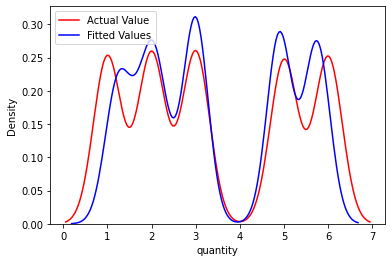

In [ ]:
#visualising validation with predicted values
ax1 = sns.distplot(y_validation, hist=False, color="r", label='Actual Value')
sns.distplot(predictions_LSTM, hist=False, color="b", label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
# evaluate the model

train_mae_LSTM, train_mse_LSTM = model_LSTM.evaluate(X_train, y_train, verbose=0)
val_mae_LSTM, val_mse_LSTM = model_LSTM.evaluate(X_validation, y_validation, verbose=0)
print('Train Mean absolute error: %.3f, Validation mean absolute error: %.3f' % (train_mae_LSTM,
                                                     val_mae_LSTM))

Train Mean absolute error: 0.238, Validation mean absolute error: 0.257


In [ ]:
print('Train Mean squared error: %.3f, Validation mean squared error: %.3f' % (train_mse_LSTM,
                                                     val_mse_LSTM))

Train Mean squared error: 0.224, Validation mean squared error: 0.263


In [ ]:
test_pred_LSTM = (model_LSTM.predict(X_test)).flatten()
print("Test predictions\n", test_pred_LSTM)

Test predictions
 [1.1899538 1.1908225 1.1840522 ... 2.99822   2.073672  2.6312668]


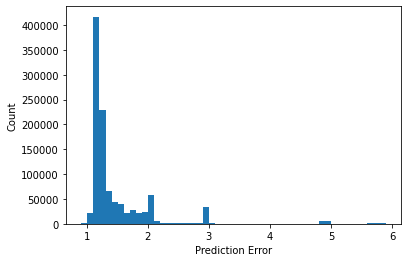

In [ ]:
def plot_prediction(y_test, test_pred):
  plt.figure()
  error = test_pred - y_test
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

plot_prediction(y_test, test_pred_LSTM)

XGBoost

In [ ]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
model_XG = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_XG, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.105 (0.004)


In [ ]:
model_XG.fit(X_train, y_train)

[21:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)

In [ ]:
# make a prediction
prediction_XG = model_XG.predict(X_validation)

In [ ]:
print("Predicted quantity \n", prediction_XG)
print("Real quantity\n", y_validation)

Predicted quantity 
 [2.060821   4.955801   1.9840008  ... 0.98046553 2.9992387  5.0120907 ]
Real quantity
 12564    2
26643    5
5466     1
7261     2
8602     2
        ..
6483     1
23372    5
4736     1
17080    3
21588    5
Name: quantity, Length: 6901, dtype: int64


In [ ]:
#Y_evaluate = model.evaluate(X_validation, y_validation)
print("Validation Mean Absolute Error: %.4f" % mean_absolute_error(y_validation, prediction_XG))

Validation Mean Absolute Error: 0.1106


In [ ]:
#Y_evaluate = model.evaluate(X_validation, y_validation)
print("Validation Mean Squared Error: %.4f" % mean_squared_error(y_validation, prediction_XG))

Validation Mean Squared Error: 0.0980


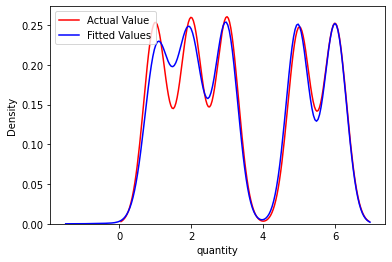

In [ ]:
#Visualising validation plot with predicted values
ax1 = sns.distplot(y_validation, hist=False, color="r", label='Actual Value')
sns.distplot(prediction_XG, hist=False, color="b", label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
#Predict on unseen test data
test_predictions_XG = model_XG.predict(X_test)
print("Test predictions\n", test_predictions_XG)


Test predictions
 [0.9559752  1.0868734  0.96857095 ... 1.4683983  1.2877707  1.3821708 ]


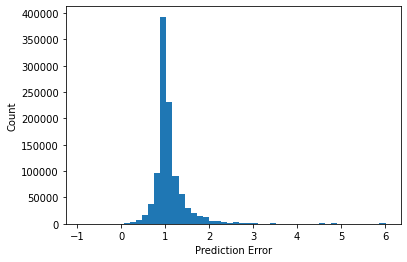

In [ ]:
#Plot true test labels and predicted test labels
def plot_prediction(test_labels, test_predictions):

#Plot prediction error
  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

plot_prediction(y_test, test_predictions_XG)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train,y_train)

# Get the mean absolute error on the validation data
predicted_RF = model_RF.predict(X_validation)
MAE = mean_absolute_error(y_validation , predicted_RF)
print('Random forest validation Mean Absolute Error = %.4f ' % MAE)

Random forest validation Mean Absolute Error = 0.0829 


In [ ]:
print("Random forest Validation Mean Squared Error:: %.4f" % mean_squared_error(y_validation, predicted_RF))

Random forest Validation Mean Squared Error:: 0.0986


In [ ]:
print("Predicted quantity \n", predicted_RF)
print("Real quantity\n", y_validation)

Predicted quantity 
 [2.         4.95470256 1.95       ... 1.         3.         5.        ]
Real quantity
 12564    2
26643    5
5466     1
7261     2
8602     2
        ..
6483     1
23372    5
4736     1
17080    3
21588    5
Name: quantity, Length: 6901, dtype: int64


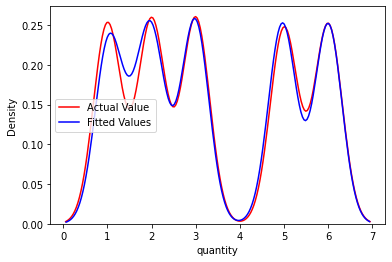

In [ ]:
#Visualising validation plot with predicted values
ax1 = sns.distplot(y_validation, hist=False, color="r", label='Actual Value')
sns.distplot(predicted_RF, hist=False, color="b", label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
#Predict on unseen test data
predicted_test_RF= model_RF.predict(X_test)
print("Test predictions\n", predicted_test_RF)

Test predictions
 [1.  1.  1.  ... 2.  1.3 2. ]


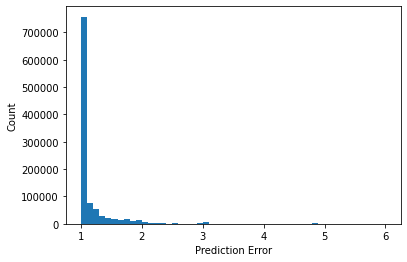

In [ ]:
#Plot true test labels and predicted test labels
def plot_prediction(test_labels, test_predictions):
#Plot prediction error
  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

plot_prediction(y_test, predicted_test_RF)